In [6]:
! pip install -q kaggle
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.4MB 8.1MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 3.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=bcdace9c79269a853e388d39b53bf1260eed1b0fe1a5cc58a23792a59182c80f
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.6/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.6/dist-packages/kaggle/api/kaggle_api_extended.py", line 149, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from google.colab import files
files.upload()
! rm -rf ~/.kaggle/
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [11]:
! kaggle datasets download robervalt/sunspots

  0% 0.00/22.4k [00:00<?, ?B/s]
100% 22.4k/22.4k [00:00<00:00, 19.9MB/s]


In [12]:
! unzip sunspots

Archive:  sunspots.zip
  inflating: Sunspots.csv            


Задание 1.
Загрузите данные. Изобразите ряд в виде графика. Вычислите основные характеристики временного ряда (сезонность, тренд, автокорреляцию).


In [19]:
import pandas as pd
data = pd.read_csv("Sunspots.csv", header=0, parse_dates=['Date'], index_col=['Date'],)
data.head()

,Unnamed: 0,Monthly Mean Total Sunspot Number
Date,,
1749-01-31,0,96.7
1749-02-28,1,104.3
1749-03-31,2,116.7
1749-04-30,3,92.8
1749-05-31,4,141.7


In [20]:
data['Monthly Mean Total Sunspot Number'].describe()

count    3252.000000
mean       82.070695
std        67.864736
min         0.000000
25%        24.200000
50%        67.750000
75%       122.700000
max       398.200000
Name: Monthly Mean Total Sunspot Number, dtype: float64

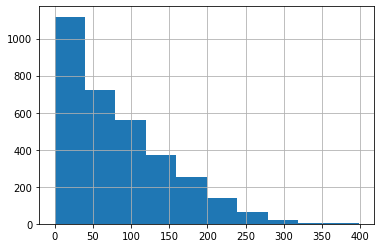

In [26]:
data['Monthly Mean Total Sunspot Number'].hist()

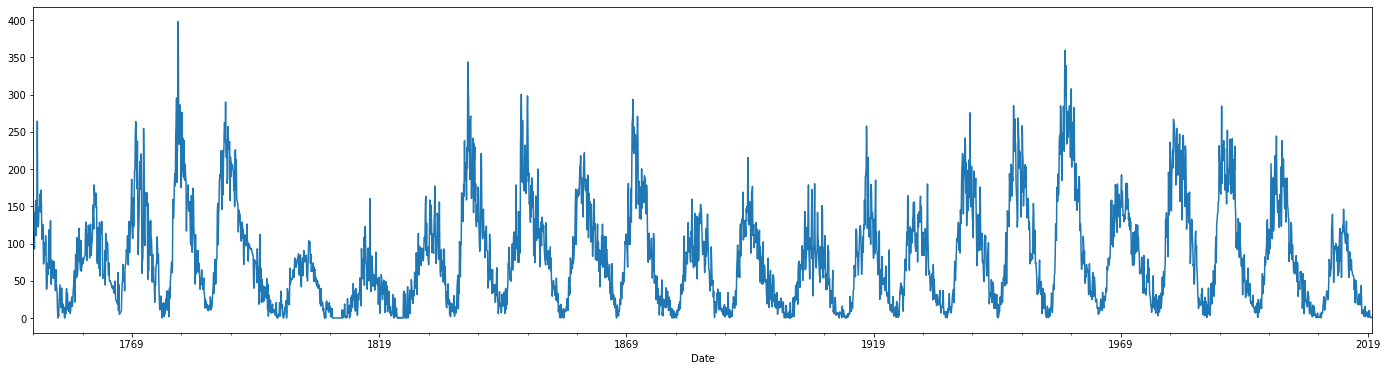

In [23]:
data['Monthly Mean Total Sunspot Number'].plot(figsize=(24,6))

Вычисление автокорреляции и сезонности

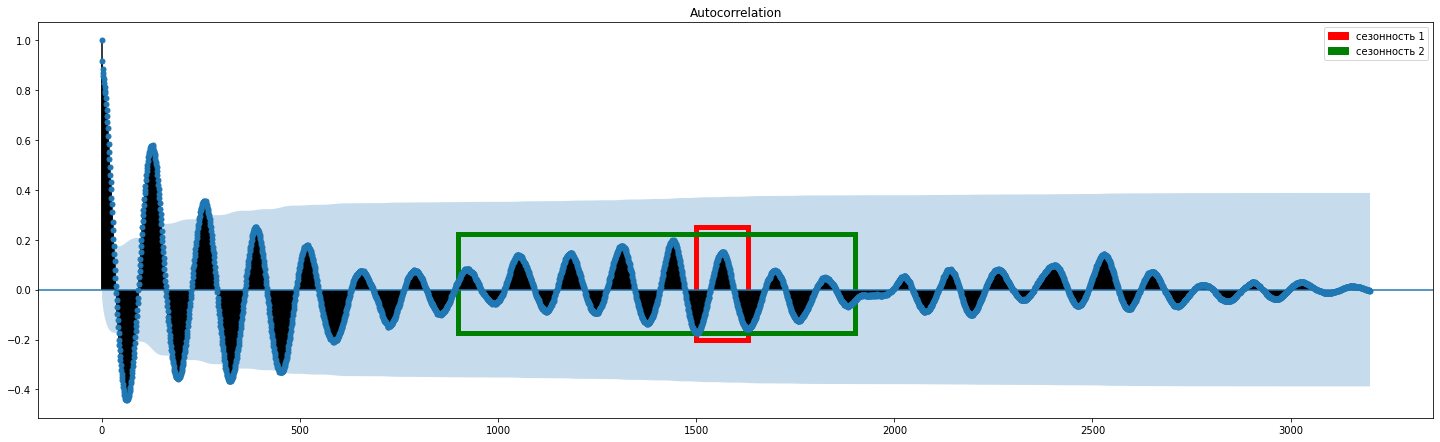

In [105]:
import statsmodels.api as sm
import matplotlib.patches as patches

datadiff = data.diff(periods=1).dropna()
fig = plt.figure(figsize=(25,16))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Monthly Mean Total Sunspot Number'].values.squeeze(), lags=3200, ax=ax1)


rect = patches.Rectangle((1500,0.25),130,-.45,linewidth=5,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax1.add_patch(rect)

rectbig = patches.Rectangle((900,0.225),1000,-.40,linewidth=5,edgecolor='g',facecolor='none')
# Add the patch to the Axes
ax1.add_patch(rectbig)

red_patch = patches.Patch(color='red', label='сезонность 1')
green_patch = patches.Patch(color='green', label='сезонность 2')
plt.legend(handles=[red_patch, green_patch])

Вычисление тренда

In [0]:
indexes = [i for i in range(data['Monthly Mean Total Sunspot Number'].count())]
vals = data['Monthly Mean Total Sunspot Number'].values
# np.polyfit()

In [117]:
import numpy as np
def trendline(index,data, order=1):
    coeffs = np.polyfit(index, list(data), order)
    slope = coeffs[-2]
    return float(slope)

# if the slope is a +ve value --> increasing trend
# if the slope is a -ve value --> decreasing trend
# if the slope is a zero value --> No trend
resultent=trendline(indexes, vals)
print(resultent) 

0.0031718163496368117


Тренда нет

Задание 2.
Для прогнозирования разделите временной ряд на обучающую, валидационную и контрольную выборки.

In [0]:
from sklearn.model_selection import train_test_split

# train 75%
# test 12.5%
# validation 12.5%

train, test = train_test_split(data, test_size=0.25)
test, validation = train_test_split(test, test_size=0.5)

Задание 3.
Примените модель ARIMA для прогнозирования значений данного временного ряда.

In [150]:
import statsmodels.api as sm
from scipy import stats

dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
arma_mod30 = sm.tsa.ARIMA(dta,order=(10,1,0)).fit(disp=False)
print(arma_mod30.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.SUNACTIVITY   No. Observations:                  308
Model:                ARIMA(10, 1, 0)   Log Likelihood               -1273.123
Method:                       css-mle   S.D. of innovations             15.017
Date:                Mon, 13 Apr 2020   AIC                           2570.245
Time:                        13:54:03   BIC                           2615.006
Sample:                    12-31-1701   HQIC                          2588.143
                         - 12-31-2008                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0944      0.318      0.297      0.766      -0.528       0.717
ar.L1.D.SUNACTIVITY      0.1827      0.057      3.197      0.002       0.071       0.295
ar.L2.D.SUNA

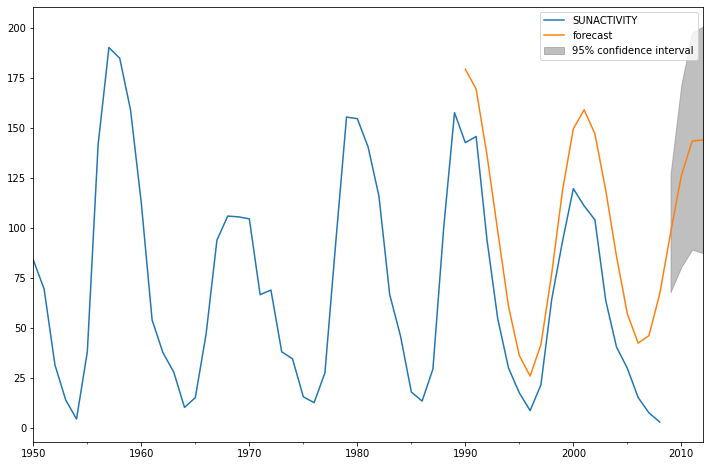

In [151]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)

Задание 4.
Повторите эксперимент по прогнозированию, реализовав рекуррентную нейронную сеть (с как минимум 2 рекуррентными слоями).

In [156]:
    
data['Monthly Mean Total Sunspot Number'].head()

train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data.iloc[0:train_size], data.iloc[train_size:len(data)]
print(len(train), len(test))

2601 651


In [157]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10


X_train, y_train = create_dataset(train, train['Monthly Mean Total Sunspot Number'], time_steps)
X_test, y_test = create_dataset(test, test['Monthly Mean Total Sunspot Number'], time_steps)

print(X_train.shape, y_train.shape)

(2591, 10, 2) (2591,)


In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True), 
                               input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1024)))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [194]:
model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/30
146/146 [==============================] - 3s 22ms/step - loss: 4443.6499 - val_loss: 9791.6641
Epoch 2/30
146/146 [==============================] - 2s 15ms/step - loss: 4246.7295 - val_loss: 9793.0156
Epoch 3/30
146/146 [==============================] - 2s 15ms/step - loss: 4248.1396 - val_loss: 9789.8926
Epoch 4/30
146/146 [==============================] - 2s 15ms/step - loss: 4246.1172 - val_loss: 9788.6455
Epoch 5/30
146/146 [==============================] - 2s 15ms/step - loss: 4245.8643 - val_loss: 9786.4365
Epoch 6/30
146/146 [==============================] - 2s 15ms/step - loss: 4244.0356 - val_loss: 9790.5547
Epoch 7/30
146/146 [==============================] - 2s 15ms/step - loss: 4243.1982 - val_loss: 9786.9766
Epoch 8/30
146/146 [==============================] - 2s 15ms/step - loss: 4241.1016 - val_loss: 9781.0547
Epoch 9/30
146/146 [==============================] - 2s 15ms/step - loss: 4238.7700 - val_loss: 9789.1885
Epoch 10/30
146/146 [================

In [0]:
y_pred = model.predict(X_test)

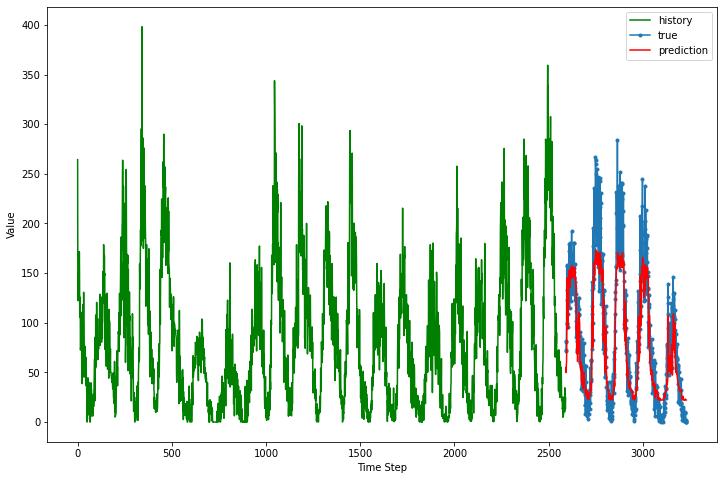

In [196]:
plt.subplots(figsize=(12, 8))
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

Задание 5.
Сравните качество прогноза моделей.

Обе модели показывают хорошие результаты. Однако стоит отметить, что график ARIMA имеет смещение  относительно вретикали, что снижает качество предсказания.
С другой стороны модель с двумя рекуррентными сетями, несмотря на хорошую точность в определённом диапазоне, имеет узкое место при уменьшении размерности второго слоя, в таком случае график имеет ограничение по диапазону.  Можно сказать, что график с двумя реккурентными сетями имеет лучшее качество